

# Project 2:House Prices (Regression)
---

# Content 
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Dummy Variables](#Dummy-Variables)
- [Modeling](#Modeling)
- [Final Results](#Final-Results)
- [Kaggle Scores](#Kaggle-Scores)


# Data Source 

- [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)

In [425]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy.stats import norm
from scipy  import stats
# import matplotlib as plt
import matplotlib.pyplot as plt


plt.style.use('seaborn-ticks')
# print(plt.style.available)

In [320]:
from sklearn import svm
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,KFold , GridSearchCV
from sklearn.metrics import recall_score
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, ElasticNet
# from sklearn.ensemble import BaggingRegressor

# Data Import & Cleaning
#### 1. Read In House Prices 

In [5]:
data_test = pd.read_csv('datasets/test.csv')
data_train = pd.read_csv('datasets/train.csv')

#### 2. Display data

In [6]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [398]:
data_train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


#### 3. Briefly describe the data
#### shape the data,  info()

In [7]:
data_test.shape

(1459, 80)

In [37]:
data_train.shape

(1460, 81)

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [400]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [9]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Visualize the data
---


Some recommendations on plotting:
- use heatmap
- use distplot
- use bar
-  scatter plots

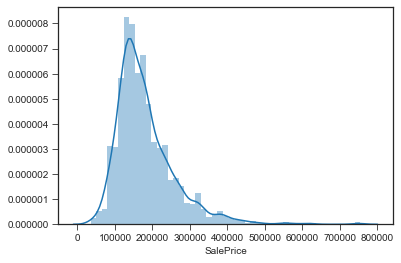

In [10]:
sns.distplot(data_train['SalePrice']);

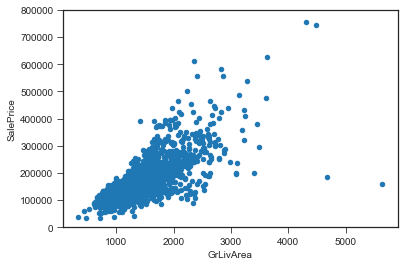

In [12]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([data_train['SalePrice'],data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

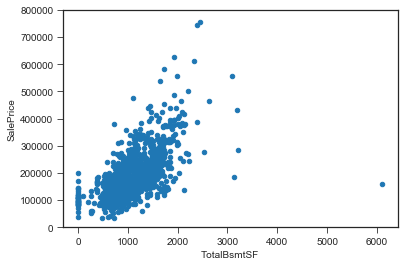

In [13]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [14]:
data_train.corr()['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

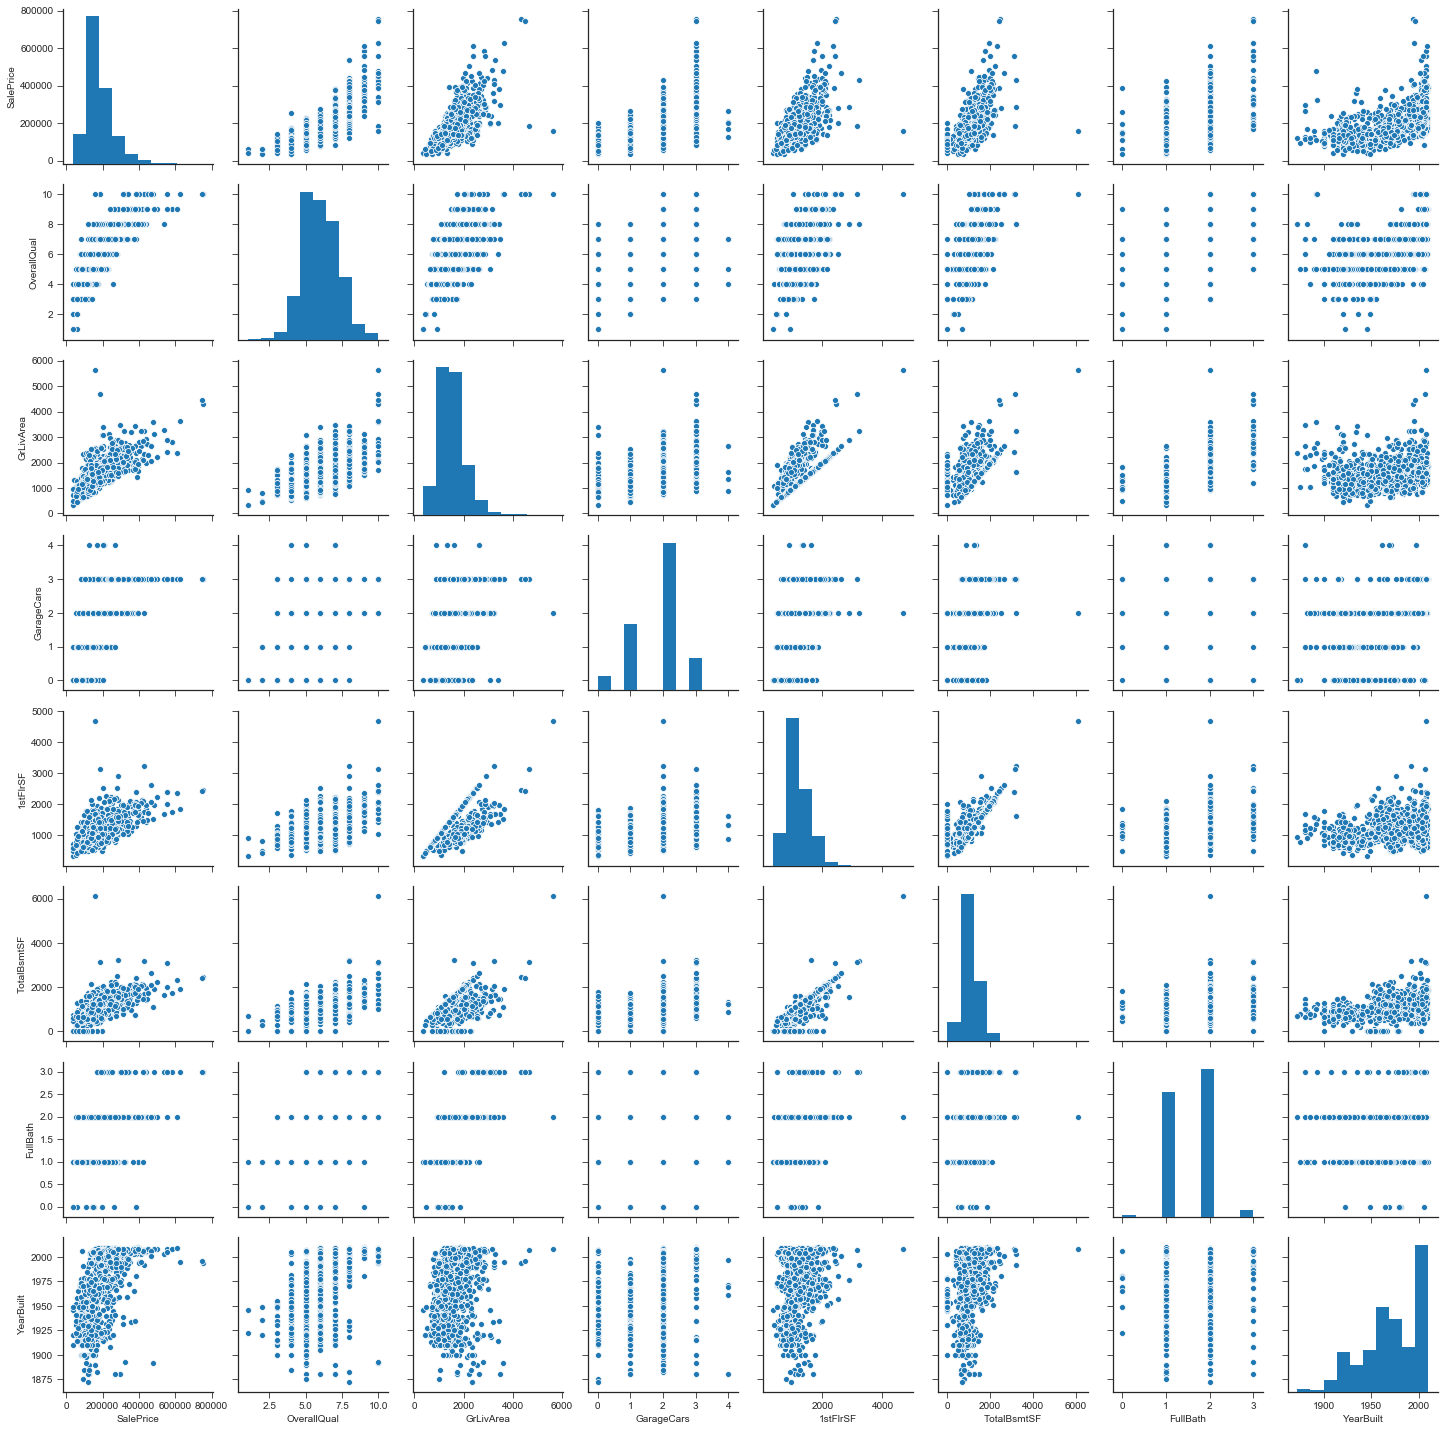

In [388]:
#scatterplot
# sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols], height = 2.5);

In [35]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(data_train[numric])
normal = normal.apply(test_normality)
normal.all()

True

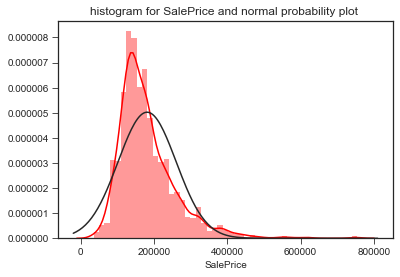

In [23]:

sns.distplot(data_train['SalePrice'], fit=norm,color='r').set_title('histogram for SalePrice and normal probability plot ');

res = stats.probplot(data_train['SalePrice'])

In [19]:
# Remove outliers

# Q1 = data_train.quantile(0.0001)
# Q3 = data_train.quantile(0.9999)
# IQR = Q3 - Q1
# # print(IQR)
# data_train = data_train[~((data_train < (Q1 - 1.5 * IQR)) |(data_train > (Q3 + 1.5 * IQR))).any(axis=1)]
# data_train.shape

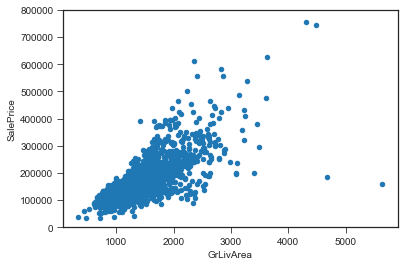

In [21]:
# without outliers

var = 'GrLivArea'
data = pd.concat([data_train['SalePrice'],data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### 2. null value in this data?

In [16]:
data_train.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [36]:
data_train[objects]=data_train[objects].fillna('None')

In [38]:
data_test[object_test]=data_test[object_test].fillna('None')

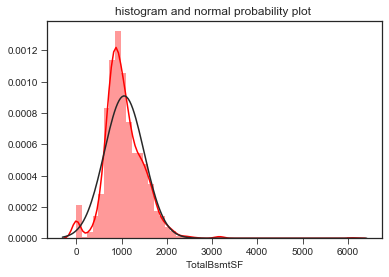

In [24]:
  
sns.distplot(data_train['TotalBsmtSF'], fit=norm ,color='r').set_title('histogram and normal probability plot ');
res = stats.probplot(data_train['TotalBsmtSF'])

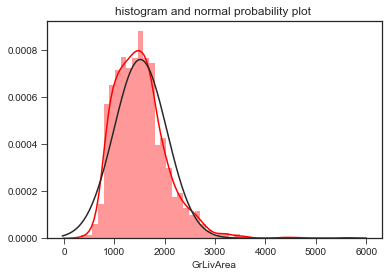

In [25]:
#transformed histogram and normal probability plot
sns.distplot(data_train['GrLivArea'], fit=norm ,color='r').set_title('histogram and normal probability plot ');

res = stats.probplot(data_train['GrLivArea'])

In [26]:
# Takes only Numric Columns
numric = [f for f in data_train.columns if data_train.dtypes[f] != 'object']
objects = [f for f in data_train.columns if data_train.dtypes[f] == 'object']
numric.remove('SalePrice')
numric.remove('Id')
numric

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [27]:
# Takes only Numric Columns
numric_test = [f for f in data_test.columns if data_test.dtypes[f] != 'object']
object_test = [f for f in data_test.columns if data_test.dtypes[f] == 'object']
# numric_test.remove('SalePrice')
numric_test.remove('Id')
numric_test

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

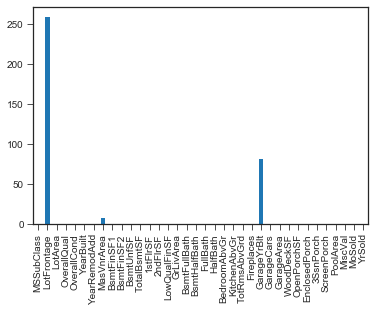

In [28]:
data_train[numric].isna().sum().plot(kind = 'bar')

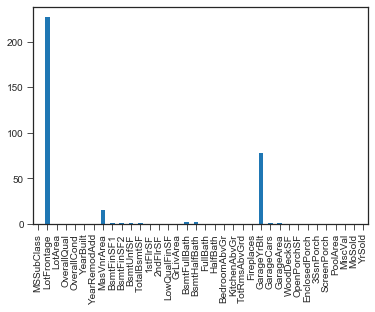

In [29]:
#  Notice The nulls are the same as in train dataset

data_test[numric].isna().sum().plot(kind = 'bar')

In [40]:
data_train[numric]=data_train[numric].fillna(data_train.mode().iloc[0])

In [41]:
data_test[numric_test]=data_test[numric_test].fillna(data_test.mode().iloc[0])

In [30]:
# Remove outliers

# Q1 = data_test.quantile(0.05)
# Q3 = data_test.quantile(0.95)
# IQR = Q3 - Q1
# # print(IQR)
# data_test = data_test[~((data_test < (Q1 - 1.5 * IQR)) |(data_test > (Q3 + 1.5 * IQR))).any(axis=1)]
# data_test.shape

In [404]:
#  No Nulls values 
data_train[numric].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [403]:
#  No Nulls values 
data_test[numric_test].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [402]:
#  No Nulls values 
data_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [379]:
test_ = data_test.columns.difference(data_train.columns)
test_.to_list()

[]

In [380]:
train_ = data_train.columns.difference(data_test.columns)
train_.to_list()

['SalePrice']

## Correlation
---

In [22]:
# sorted corrlation with SalePrice

data_train.corr()['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [33]:
data_test.MasVnrArea.mean() , data_test.MasVnrArea.mode()

(100.70914127423822, 0    0.0
 dtype: float64)

In [34]:
stats.mode(data_train.MasVnrArea)[0]

array([0.])

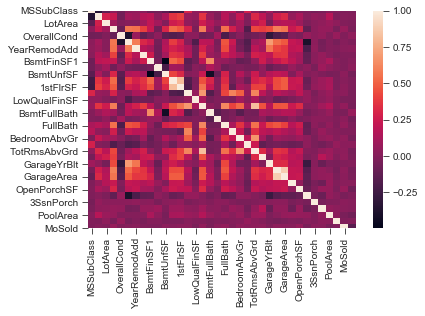

In [262]:
sns.heatmap(data_train[numric].corr())

### Try to predict SalePrices based on numeric featurs only

In [46]:
len(data_train)

1460

In [47]:
len(data_test[numric_test])

1459

In [49]:
y = data_train.SalePrice
X_train = data_train[numric]
len(X_train)

1460

In [50]:
x_test = data_test[numric_test]

In [52]:
# scalar = StandardScaler()
# clf_ = svm.LinearSVC()

# pipeline = Pipeline([('transformer', scalar), ('estimator', clf_)])

# cv = KFold(n_splits=4)
# scores = cross_val_score(pipeline, X_train, y, cv = cv)
# scores

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.00821918, 0.        , 0.00547945, 0.00547945])

In [377]:

# clf = svm.LinearSVC()

# scalar = StandardScaler()
# X_tr= scalar.fit_transform(X_train)
# X_te = scalar.transform(x_test)
# scores = cross_validate(clf, X_tr, y)
# clf.fit(X_tr, y)
# predicted = clf.predict(X_te)
# predicted

In [54]:
first_prediction = clf.predict(X_tr)
len(first_prediction)

1460

In [55]:
submission = pd.read_csv('datasets/sample_submission.csv')
# submission.iloc[:,1] = np.floor(predicted)

In [56]:
len(predicted)

1459

In [57]:
Q1 = submission.quantile(0.05)
Q3 = submission.quantile(0.95)
IQR = Q3 - Q1
# print(IQR)
submission = submission[~((submission < (Q1 - 1.5 * IQR)) |(submission > (Q3 + 1.5 * IQR))).any(axis=1)]
submission.shape

(1459, 2)

In [58]:
q1 = submission['SalePrice'].quantile(0.05)
q2 = submission['SalePrice'].quantile(0.95)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*1.5)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.5)
# submission.to_csv("submission.csv", index=False)

In [60]:
submission.iloc[:,1] = np.floor(predicted)

In [61]:
submission

,Id,SalePrice
0,1461,135500.0
1,1462,207500.0
2,1463,175000.0
3,1464,175000.0
4,1465,245350.0
...,...,...
1454,2915,84500.0
1455,2916,75000.0
1456,2917,149900.0
1457,2918,81000.0


In [62]:

submission.to_csv("new_submission.csv", index=False)

<hr>

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.
### 1. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [63]:
dummy_train = pd.get_dummies(data_train,drop_first=True)
dummy_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [64]:
m = dummy_train.corr()['SalePrice'].sort_values(ascending= False)[dummy_train.corr()['SalePrice']<.007  ]

In [65]:
n = dummy_train.corr()['SalePrice'].sort_values(ascending= False)[dummy_train.corr()['SalePrice']>.007  ]

In [67]:
dummy_train.shape

(1460, 262)

In [68]:
# dummy_train.columns.to_list()

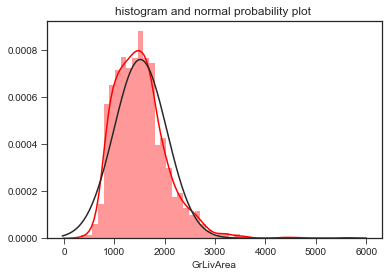

In [70]:
#transformed histogram and normal probability plot
sns.distplot(dummy_train['GrLivArea'], fit=norm ,color='r').set_title('histogram and normal probability plot ');
res = stats.probplot(dummy_train['GrLivArea'])



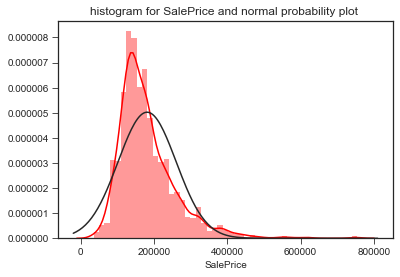

In [71]:
sns.distplot(dummy_train['SalePrice'], fit=norm,color='r').set_title(
    'histogram for SalePrice and normal probability plot ');
res_price = stats.probplot(dummy_train['SalePrice'])

In [72]:
dummy_train.isnull().sum().sort_values(ascending = False)

SaleCondition_Partial    0
BldgType_2fmCon          0
Condition2_RRAn          0
Condition2_RRAe          0
Condition2_PosN          0
                        ..
BsmtCond_None            0
BsmtCond_Gd              0
BsmtQual_TA              0
BsmtQual_None            0
Id                       0
Length: 262, dtype: int64

In [73]:
dummy_test = pd.get_dummies(data_test,drop_first=True)
dummy_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


In [74]:
dummy_test.shape

(1459, 249)

In [75]:
dummy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 249 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(212)
memory usage: 723.9 KB




### 2. Remove "Unkown" from the dataframe containing our dummies. Append the rest to the original data.

* Creating dummies produced unwanted columns due the difference between the test data and train data,
   we well drop the inequality columns to keep the similar structure between train data and test data

In [76]:
#  Creating dummies produced unwanted columns due the difference between the test data and train data,
# we well drop the inequality columns to keep the similar structure between train data and test data

train_not_test = dummy_train.columns.difference(dummy_test.columns)
columns_tr =  train_not_test.to_list()
columns_tr.pop(18) # drop the SalePrice from the list
columns_tr

['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Electrical_None',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Fa',
 'Heating_GasA',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'MiscFeature_TenC',
 'PoolQC_Fa',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa']

In [77]:
dummy_train.drop('Id',axis=1,inplace=True)

In [78]:
dummy_train.drop(columns_tr,axis=1,inplace=True)

In [79]:
dummy_test.drop('Id',axis=1,inplace=True)

In [91]:
test_not_train = dummy_test.columns.difference(dummy_train.columns)
ser = test_not_train.to_list()

dummy_test.drop(ser,axis=1,inplace=True)

In [273]:
test_not_train

Index(['SaleType_None'], dtype='object')

## Correlation
---

In [423]:
a = dummy_train.corr()['SalePrice'].sort_values(ascending= False)
a

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
                      ...   
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
FireplaceQu_None   -0.471908
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 242, dtype: float64

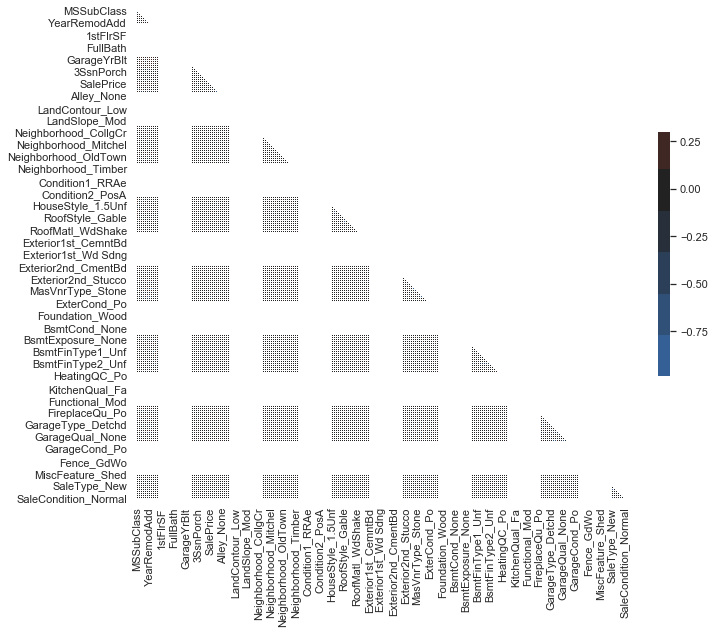

In [439]:
# sns.heatmap()
# sns.set(rc={'figure.figsize':(20,20)})


# Compute the correlation matrix
corr = dummy_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                                  n=9, center="dark")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 1. Which variable would be the best predictor of Y in an model?

In [92]:
X_dtrain = dummy_train.drop('SalePrice',axis=1)
X_dtest = dummy_test

X_dtest.shape,X_dtrain.shape

((1459, 241), (1460, 241))

In [93]:
# 'SalePrice' is the target 
y = dummy_train['SalePrice']
y.shape

(1460,)

# Modeling  
-  we created different models, compared between scores and selected the best score 
- [Final Results](#Final-Results)


In [137]:
#  Result : Dummies datasets in Lasso model showed less improvement


scaler_2 = StandardScaler()
X_train= scaler_2.fit_transform(X_dtrain)
X_test = scaler_2.transform(X_dtest)
# g = GridSearchCV(lass , {'alpha': []})
# lass = Lasso(alpha=0.5)

# cv = KFold(n_splits=10)

# lass_scores = cross_validate(lass, X_train, y, cv=cv);

In [96]:
# lass_scores

In [ ]:
# lass.fit(X_train,y)
# lass.predict(X_train)

In [126]:
forest_params = {'n_estimators':[50, 75, 100, 200], 'max_depth':[4, 6, 10, 15, 20, 30], 'max_features':['sqrt', 'auto']}

forest_grid = GridSearchCV(RandomForestRegressor(), forest_params, n_jobs=-1, cv=KFold(n_splits=20), verbose=2)

forest_results = forest_grid.fit(X_train, y)

Fitting 20 folds for each of 48 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 395 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.8min finished


In [127]:
forest_results.best_score_, forest_results.best_params_

(0.8602747719203342,
 {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 100})

In [128]:
best_model = forest_results.best_estimator_
y_test_preds = np.floor(best_model.predict(X_dtest))

In [129]:
y_test_preds

array([338426., 359917., 430843., ..., 358299., 303581., 466161.])

In [384]:
mse = np.sqrt(mean_squared_error(y, y_test_preds))
print("MSE: %.4f" % mse)

MSE: 213151.8021


In [131]:
submission_s = pd.read_csv('datasets/sample_submission.csv')
submission_s.iloc[:,1] = y_test_preds

In [132]:
submission_s.to_csv("new_submission_s.csv", index=False)

In [115]:

# slight improvement, lets try zooming in on the range and doing a new gridsearch
elastic_params = {'alpha':[.005, .006, .007, .008, .009, .01, .015, .025, .035, .04],
                 'l1_ratio':[.25, .275, .285, .295, .3, .315, .325, .335, .35, .365],
                 'estimator': []}

elastic_grid = GridSearchCV(ElasticNet(), elastic_params, n_jobs=-1, cv=KFold(n_splits=10, shuffle=True), verbose=2)

results = elastic_grid.fit(X_train, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


In [141]:
w = np.floor(results.predict(X_test))

In [200]:
elastic_grid.best_score_

0.8066182243276521

In [383]:
mse = np.sqrt(mean_squared_error(y, w))
print("MSE: %.4f" % mse)

MSE: 109844.6985


In [142]:
submission_s.iloc[:,1] = w
submission_s.to_csv("new_submission_s.csv", index=False)

In [187]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 80,70, 90,100],
    'max_features': [8,9,10,11,12],
    'min_samples_leaf': [1,2, 3],
    'min_samples_split': [6,7,8,9],
    'n_estimators': [50,60,65,70 ]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_randomforst = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv=KFold(n_splits=10), n_jobs = -1, verbose = 2)

In [188]:
grid_randomforst.fit(X_train, y)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='w...obs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,


In [181]:
grid_randomforst.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 60}

In [182]:
grid_randomforst.best_score_

0.8537208221262704

In [201]:
forst = grid_randomforst.predict(X_test)

In [385]:
mse = np.sqrt(mean_squared_error(y, forst))
print("MSE: %.4f" % mse)

MSE: 102937.1158


In [202]:
#  give good scores on Kaggle 

submission_forst = pd.read_csv('datasets/sample_submission.csv')
submission_forst.iloc[:,1] =np.floor(forst)
submission_forst.to_csv("new_submission_forst_score.csv", index=False)

In [256]:

svr_poly = svm.SVR()
# Cs = [0.001, 0.01, 0.1, 0.5,0.03]
# gammas = [0.001, 0.01, 0.1, 1]
nfolds = KFold(n_splits=10)
param_grid = {'kernel':['rbf','poly'], 'C':[20 , 30 ,40,50], 'gamma':['auto'], 'epsilon':[.1] , 'degree':[3,4,5,6] ,'coef0': [1,2,3]}
grid_search = GridSearchCV(svr_poly,param_grid=param_grid  ,cv=nfolds,n_jobs = -1, verbose = 2)
grid_search

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVR(C=100, cache_size=200, coef0=1, degree=3,
                           epsilon=0.1, gamma='auto', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [20, 30, 40, 50], 'coef0': [1, 2, 3],
                         'degree': [3, 4, 5, 6], 'epsilon': [0.1],
                         'gamma': ['auto'], 'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [257]:
grid_search.fit(X_train, y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.2min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVR(C=100, cache_size=200, coef0=1, degree=3,
                           epsilon=0.1, gamma='auto', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [20, 30, 40, 50], 'coef0': [1, 2, 3],
                         'degree': [3, 4, 5, 6], 'epsilon': [0.1],
                         'gamma': ['auto'], 'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [258]:
grid_search.best_score_

0.8457064608965856

In [259]:
grid_search.best_params_

{'C': 30,
 'coef0': 3,
 'degree': 5,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'poly'}

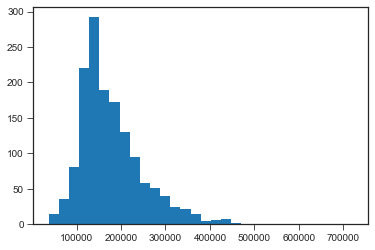

In [315]:

plt.hist(grid_search.predict(X_test) , bins= 30);

In [386]:
mse = np.sqrt(mean_squared_error(y, grid_search.predict(X_test)))
print("MSE: %.4f" % mse)

MSE: 105578.9408


In [261]:
submission_svm = pd.read_csv('datasets/sample_submission.csv')
submission_svm.iloc[:,1] =np.floor(grid_search.predict(X_test))
submission_svm.to_csv("new_submission_svm.csv", index=False)

In [292]:



gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)

In [293]:
gbr.fit(X_train, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [301]:
boosting = gbr.predict(X_test)

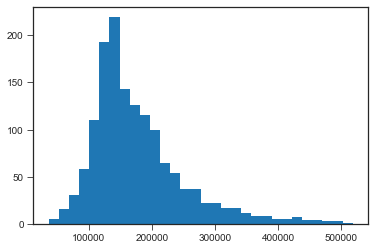

In [318]:
plt.hist(boosting, bins= 30);

In [396]:
mse = np.sqrt(mean_squared_error(y, boosting))
print("MSE: %.4f" % mse)

MSE: 109369.6336


In [371]:
 scores = gbr.score(X_test , y)

In [355]:
submission_boosting = pd.read_csv('datasets/sample_submission.csv')
submission_boosting.iloc[:,1] =np.floor(boosting)
submission_boosting.to_csv("new_submission_boosting.csv", index=False)

# Final Results 

In [376]:
data = {'models': ['GridSearchCV(RandomForestRegressor())' ,'GridSearchCV(ElasticNet())' , 
                   'GridSearchCV(RandomForestRegressor())','GridSearchCV(svm.SVR())' ,'GradientBoostingRegressor()' ] , 
        'scores ': [forest_results.best_score_,elastic_grid.best_score_ ,grid_randomforst.best_score_,grid_search.best_score_ , scores ]}


In [375]:
modelling_scores = pd.DataFrame(data)
modelling_scores 

,models,scores
0,GridSearchCV(RandomForestRegressor()),0.860275
1,GridSearchCV(ElasticNet()),0.806618
2,GridSearchCV(RandomForestRegressor()),0.851472
3,GridSearchCV(svm.SVR()),0.845706
4,GradientBoostingRegressor(),0.895342


# Kaggle Scores

<img src = 'kaggle.png'>